In [2]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split

# Fixed random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Paths to your files (update these as needed)
CSV_PATH = "datasets/healthcare_dataset.csv"
TRAIN_PATH = "train_healthcare.csv"
TEST_PATH = "test_healthcare.csv"

def preprocess_medical_data(df):
    df = df.copy()
    df = df.fillna("")
    df["Name"] = df["Name"].astype(str).str.title()
    df["Hospital"] = (
        df["Hospital"].astype(str)
        .str.replace(r",+$", "", regex=True)
        .str.strip()
    )
    df["Test Results"] = (
        df["Test Results"].astype(str)
        .str.lower()
        .replace({"abnormal sample data": "abnormal"})
        .str.title()
    )
    df["Billing Amount"] = (
        pd.to_numeric(df["Billing Amount"], errors="coerce").round(2)
    )
    df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
    df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors="coerce")
    df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
    # Concatenate text for NLP tasks
    df["text_for_nlp"] = (
        "Patient " + df["Name"].astype(str) +
        ", Age " + df["Age"].astype(str) +
        ", Gender " + df["Gender"].astype(str) +
        ", Blood Type " + df["Blood Type"].astype(str) +
        ", Condition: " + df["Medical Condition"].astype(str) +
        ". Doctor: " + df["Doctor"].astype(str) +
        ". Hospital: " + df["Hospital"].astype(str) +
        ". Insurance: " + df["Insurance Provider"].astype(str) +
        ". Room Number: " + df["Room Number"].astype(str) +
        ". Admission Type: " + df["Admission Type"].astype(str) +
        ". Medication: " + df["Medication"].astype(str) +
        ". Test Results: " + df["Test Results"].astype(str) +
        ". Length of Stay: " + df["Length of Stay"].astype(str)
    ).str.lower()
    return df

# Main block
if __name__ == "__main__":
    if os.path.exists(CSV_PATH):
        df = pd.read_csv(CSV_PATH)
        print(f"Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns")
    else:
        raise FileNotFoundError(f"{CSV_PATH} not found. Please place your dataset in the folder.")

    df = preprocess_medical_data(df)
    train_df, test_df = train_test_split(
        df, test_size=0.2, random_state=RANDOM_SEED, shuffle=True
    )
    train_df.to_csv(TRAIN_PATH, index=False)
    test_df.to_csv(TEST_PATH, index=False)
    print(f"Data prepared: {len(train_df)} train, {len(test_df)} test.")

Loaded dataset: 55500 rows, 15 columns
Data prepared: 44400 train, 11100 test.


In [4]:
# -------------------------------------------------------
# TF-IDF Vectorization for Healthcare Dataset
# -------------------------------------------------------
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Paths for saving the trained vectorizer and TF-IDF matrix
MODEL_PATH = "healthcare_vectorizer.pkl"
MATRIX_PATH = "healthcare_tfidf_matrix.pkl"

# -------------------------------------------------------
# Step 1: Load datasets
# -------------------------------------------------------
train_df = pd.read_csv("train_healthcare.csv")
full_df = pd.read_csv("datasets/healthcare_dataset.csv")

# -------------------------------------------------------
# Step 2: Preprocessing function
# -------------------------------------------------------
def preprocess_medical_data(df):
    df = df.copy()
    df = df.fillna("")
    df["Name"] = df["Name"].astype(str).str.title()
    df["Hospital"] = (
        df["Hospital"].astype(str)
        .str.replace(r",+$", "", regex=True)
        .str.strip()
    )
    df["Test Results"] = (
        df["Test Results"]
        .astype(str)
        .str.lower()
        .replace({"abnormal sample data": "abnormal"})
        .str.title()
    )
    df["Billing Amount"] = pd.to_numeric(df["Billing Amount"], errors="coerce").round(2)
    df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], errors="coerce")
    df["Discharge Date"] = pd.to_datetime(df["Discharge Date"], errors="coerce")
    df["Length of Stay"] = (df["Discharge Date"] - df["Date of Admission"]).dt.days
    # Build text_for_nlp column
    df["text_for_nlp"] = (
        "Patient " + df["Name"].astype(str) +
        ", Age " + df["Age"].astype(str) +
        ", Gender " + df["Gender"].astype(str) +
        ", Blood Type " + df["Blood Type"].astype(str) +
        ", Condition: " + df["Medical Condition"].astype(str) +
        ". Doctor: " + df["Doctor"].astype(str) +
        ". Hospital: " + df["Hospital"].astype(str) +
        ". Insurance: " + df["Insurance Provider"].astype(str) +
        ". Room Number: " + df["Room Number"].astype(str) +
        ". Admission Type: " + df["Admission Type"].astype(str) +
        ". Medication: " + df["Medication"].astype(str) +
        ". Test Results: " + df["Test Results"].astype(str) +
        ". Length of Stay: " + df["Length of Stay"].astype(str)
    ).str.lower()
    return df

# Apply preprocessing
train_df = preprocess_medical_data(train_df)
full_df = preprocess_medical_data(full_df)

# -------------------------------------------------------
# Step 3: Train TF-IDF Vectorizer
# -------------------------------------------------------
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
vectorizer.fit(train_df["text_for_nlp"])

# -------------------------------------------------------
# Step 4: Transform full dataset
# -------------------------------------------------------
tfidf_matrix = vectorizer.transform(full_df["text_for_nlp"])

# -------------------------------------------------------
# Step 5: Save model and results
# -------------------------------------------------------
joblib.dump(vectorizer, MODEL_PATH)
joblib.dump({"matrix": tfidf_matrix, "df": full_df}, MATRIX_PATH)

print(f"✅ Healthcare TF-IDF model saved to {MODEL_PATH} and {MATRIX_PATH}")

✅ Healthcare TF-IDF model saved to healthcare_vectorizer.pkl and healthcare_tfidf_matrix.pkl


TF-IDF matrix shape: (55500, 5000), Sparsity: 1.26%
Top 20 words/phrases by TF-IDF importance:
type: 3876.42
doctor: 1938.21
gender: 1938.21
admission: 1938.21
of stay: 1938.21
number: 1938.21
of: 1938.21
patient: 1938.21
results: 1938.21
stay: 1938.21
test: 1938.21
length of: 1938.21
test results: 1938.21
blood: 1938.21
blood type: 1938.21
insurance: 1938.21
condition: 1938.21
room: 1938.21
admission type: 1938.21
medication: 1938.21


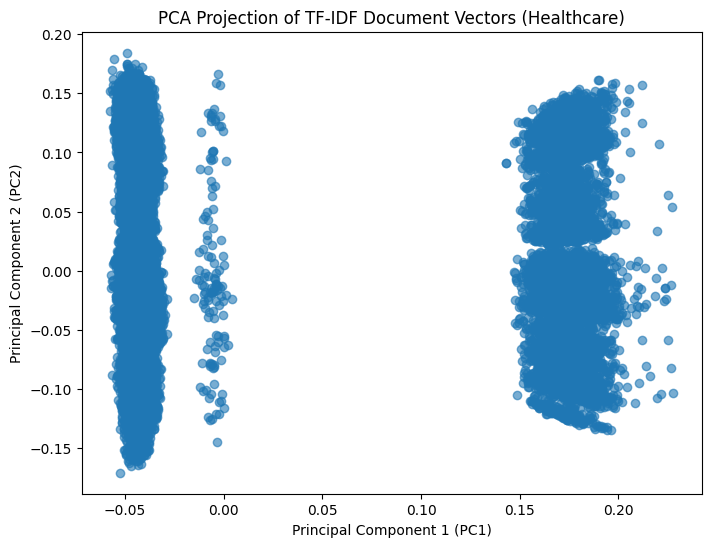

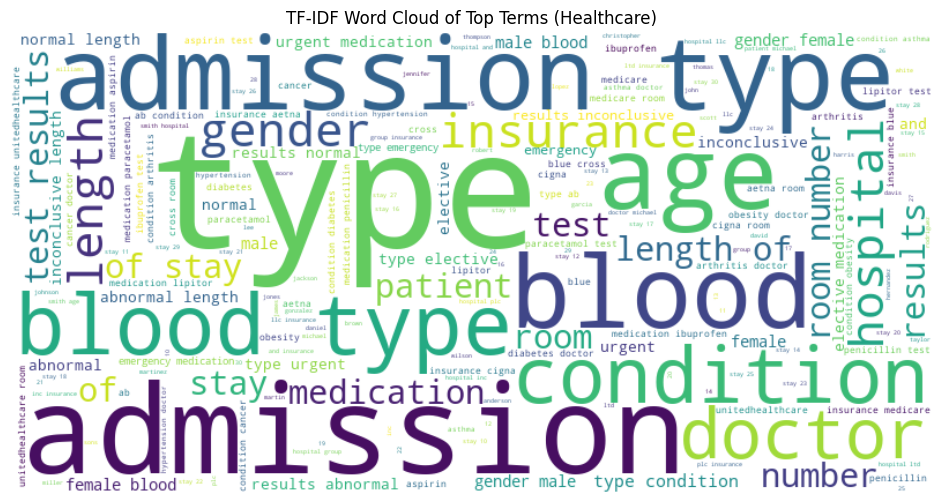

In [7]:
# -------------------------------------------------------
# TF-IDF Analysis & Visualization for Healthcare Dataset
# -------------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import joblib

# -------------------------------------------------------
# Step 0: Load TF-IDF matrix and vectorizer
# -------------------------------------------------------
MATRIX_PATH = "healthcare_tfidf_matrix.pkl"
MODEL_PATH = "healthcare_vectorizer.pkl"

data = joblib.load(MATRIX_PATH)
tfidf_matrix = data["matrix"]
full_df = data["df"]
vectorizer = joblib.load(MODEL_PATH)

# -------------------------------------------------------
# 1. Sparsity of TF-IDF matrix
# -------------------------------------------------------
sparsity = 100.0 * (tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}, Sparsity: {sparsity:.2f}%")

# -------------------------------------------------------
# 2. Top 20 words/phrases by overall TF-IDF importance
# -------------------------------------------------------
feature_names = np.array(vectorizer.get_feature_names_out())
tfidf_sum = np.array(tfidf_matrix.sum(axis=0)).flatten()
top_indices = tfidf_sum.argsort()[::-1][:20]

print("Top 20 words/phrases by TF-IDF importance:")
for word, score in zip(feature_names[top_indices], tfidf_sum[top_indices]):
    print(f"{word}: {score:.2f}")

# -------------------------------------------------------
# 3. PCA projection of documents (2D)
# -------------------------------------------------------
# (Optional: For large datasets, you may want to use a random sample for PCA)
try:
    reduced = PCA(n_components=2).fit_transform(tfidf_matrix.toarray())
    plt.figure(figsize=(8,6))
    plt.scatter(reduced[:,0], reduced[:,1], alpha=0.6)
    plt.title("PCA Projection of TF-IDF Document Vectors (Healthcare)")
    plt.xlabel("Principal Component 1 (PC1)")
    plt.ylabel("Principal Component 2 (PC2)")
    plt.show()
except MemoryError:
    print("Warning: Not enough memory to perform PCA on the full matrix. Consider subsampling.")

# -------------------------------------------------------
# 4. Word Cloud of Top Terms
# -------------------------------------------------------
top_words_dict = {feature_names[i]: tfidf_sum[i] for i in range(len(feature_names))}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Word Cloud of Top Terms (Healthcare)")
plt.show()


In [10]:
# -------------------------------------------------------
# Healthcare Patient/Record Search using TF-IDF & Cosine Similarity
# -------------------------------------------------------
import textwrap
import joblib
from sklearn.metrics.pairwise import cosine_similarity

MODEL_PATH = "healthcare_vectorizer.pkl"
MATRIX_PATH = "healthcare_tfidf_matrix.pkl"

# Step 1: Load trained TF-IDF vectorizer
vectorizer = joblib.load(MODEL_PATH)

# Step 2: Load TF-IDF matrix and patient data
data = joblib.load(MATRIX_PATH)
tfidf_matrix = data["matrix"]  # TF-IDF vectors
df = data["df"]                # Full patient records

# Step 3: Patient record search function
def search_patient_records(query, top_k=3):
    """
    Returns the top_k patient records most similar to the query.
    - query: user query (string)
    - top_k: number of results to return
    """
    query_vec = vectorizer.transform([query.lower()])
    sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_idx = sims.argsort()[::-1][:top_k]
    print(f"\n🔎 Query: {query}")
    for idx in top_idx:
        row = df.iloc[idx]
        snippet = textwrap.shorten(row["text_for_nlp"], width=250, placeholder="...")
        print(f"\n📌 Patient: {row['Name']} | Age: {row['Age']} | Gender: {row['Gender']} | Score={sims[idx]:.3f}")
        print(f"Condition: {row['Medical Condition']} | Doctor: {row['Doctor']} | Hospital: {row['Hospital']}")
        print(f"Record snippet: {snippet}")

# Step 4: Example usage
search_patient_records("diabetes treatment with insulin and monitoring", top_k=3)



🔎 Query: diabetes treatment with insulin and monitoring

📌 Patient: Javier Clark | Age: 51 | Gender: Male | Score=0.141
Condition: Diabetes | Doctor: Michael Anthony | Hospital: and Kim Sons
Record snippet: patient javier clark, age 51, gender male, blood type a+, condition: diabetes. doctor: michael anthony. hospital: and kim sons. insurance: cigna. room number: 313. admission type: emergency. medication: aspirin. test results: abnormal. length of...

📌 Patient: Savannah Navarro | Age: 64 | Gender: Female | Score=0.136
Condition: Diabetes | Doctor: Kristie Burgess | Hospital: Carey Davis, Turner and
Record snippet: patient savannah navarro, age 64, gender female, blood type a-, condition: diabetes. doctor: kristie burgess. hospital: carey davis, turner and. insurance: aetna. room number: 165. admission type: urgent. medication: ibuprofen. test results:...

📌 Patient: Kathleen Perez | Age: 16 | Gender: Male | Score=0.135
Condition: Diabetes | Doctor: Chelsey Jordan | Hospital: Sons Cr

In [11]:
# -------------------------------------------------------
# Advanced Healthcare Record Search using TF-IDF + Cosine Similarity
# -------------------------------------------------------
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------
# Step 1: Load saved TF-IDF vectorizer & matrix
# --------------------------
vectorizer = joblib.load("healthcare_vectorizer.pkl")   # TF-IDF model
data = joblib.load("healthcare_tfidf_matrix.pkl")       # Contains TF-IDF matrix + full dataset
tfidf_matrix = data["matrix"]                           # Sparse TF-IDF vectors
full_df = data["df"]                                    # Full healthcare dataset

# --------------------------
# Step 2: Query function with filters
# --------------------------
def search_patient_records(query, top_k=5, condition=None, doctor=None, hospital=None):
    """
    Search patient records using TF-IDF similarity and optional filters.

    Parameters:
    - query: str, text query
    - top_k: int, number of results to return
    - condition: str, optional filter for Medical Condition
    - doctor: str, optional filter for Doctor
    - hospital: str, optional filter for Hospital

    Returns:
    - List of dicts with patient info and similarity scores
    """
    # Preprocess the query
    query_vec = vectorizer.transform([query.lower()])
    # Compute cosine similarity
    sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    # Add similarity to DataFrame
    df_copy = full_df.copy()
    df_copy["Similarity"] = sims
    # Apply optional filters
    if condition:
        df_copy = df_copy[df_copy["Medical Condition"].str.contains(condition, case=False, na=False)]
    if doctor:
        df_copy = df_copy[df_copy["Doctor"].str.contains(doctor, case=False, na=False)]
    if hospital:
        df_copy = df_copy[df_copy["Hospital"].str.contains(hospital, case=False, na=False)]
    # Get top_k results sorted by similarity
    top_records = df_copy.sort_values(by="Similarity", ascending=False).head(top_k)
    # Prepare results
    results = []
    for _, row in top_records.iterrows():
        results.append({
            "Name": row["Name"],
            "Age": row["Age"],
            "Gender": row["Gender"],
            "Medical Condition": row["Medical Condition"],
            "Doctor": row["Doctor"],
            "Hospital": row["Hospital"],
            "Similarity": float(row["Similarity"])
        })
    return results

# --------------------------
# Step 3: Demo usage
# --------------------------
query = "diabetes treatment with insulin and monitoring"
top_matches = search_patient_records(query, top_k=5, condition="Diabetes", doctor="Matthew Smith")

# Print results
for i, res in enumerate(top_matches, 1):
    print(f"{i}. {res['Name']} | Age: {res['Age']} | Gender: {res['Gender']}")
    print(f"   Condition: {res['Medical Condition']} | Doctor: {res['Doctor']} | Hospital: {res['Hospital']}")
    print(f"   Similarity Score: {res['Similarity']:.2f}\n")

1. Ryan Holmes | Age: 50 | Gender: Male
   Condition: Diabetes | Doctor: Matthew Smith | Hospital: Parrish-Benitez
   Similarity Score: 0.08



In [21]:
# -------------------------------------------------------
# Advanced Healthcare Record Search using TF-IDF + Cosine Similarity
# -------------------------------------------------------
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------
# Step 1: Load saved TF-IDF vectorizer & matrix
# --------------------------
vectorizer = joblib.load("healthcare_vectorizer.pkl")   # TF-IDF model
data = joblib.load("healthcare_tfidf_matrix.pkl")       # Contains TF-IDF matrix + full dataset
tfidf_matrix = data["matrix"]                           # Sparse TF-IDF vectors
full_df = data["df"]                                    # Full healthcare dataset

# --------------------------
# Step 2: Query function with filters and diagnostic output
# --------------------------
def search_patient_records(query, top_k=3, condition=None, doctor=None, hospital=None):
    """
    Search patient records using TF-IDF similarity and optional filters.

    Parameters:
    - query: str, text query
    - top_k: int, number of results to return
    - condition: str, optional filter for Medical Condition
    - doctor: str, optional filter for Doctor
    - hospital: str, optional filter for Hospital

    Returns:
    - List of dicts with patient info and similarity scores
    """
    # Preprocess the query
    query_vec = vectorizer.transform([query.lower()])
    # Compute cosine similarity
    sims = cosine_similarity(query_vec, tfidf_matrix).flatten()
    # Add similarity to DataFrame
    df_copy = full_df.copy()
    df_copy["Similarity"] = sims
    # Apply optional filters
    if condition:
        df_copy = df_copy[df_copy["Medical Condition"].str.contains(condition, case=False, na=False)]
    if doctor:
        df_copy = df_copy[df_copy["Doctor"].str.contains(doctor, case=False, na=False)]
    if hospital:
        df_copy = df_copy[df_copy["Hospital"].str.contains(hospital, case=False, na=False)]
    
    print(f"Records after filtering: {len(df_copy)}")  # Diagnostic output
    
    # Get top_k results sorted by similarity
    top_records = df_copy.sort_values(by="Similarity", ascending=False).head(top_k)
    # Prepare results
    results = []
    for _, row in top_records.iterrows():
        results.append({
            "Name": row.get("Name", ""),
            "Age": row.get("Age", ""),
            "Gender": row.get("Gender", ""),
            "Blood Type": row.get("Blood Type", ""),
            "Medical Condition": row.get("Medical Condition", ""),
            "Date of Admission": row.get("Date of Admission", ""),
            "Doctor": row.get("Doctor", ""),
            "Hospital": row.get("Hospital", ""),
            "Insurance Provider": row.get("Insurance Provider", ""),
            "Billing Amount": row.get("Billing Amount", ""),
            "Room Number": row.get("Room Number", ""),
            "Admission Type": row.get("Admission Type", ""),
            "Discharge Date": row.get("Discharge Date", ""),
            "Medication": row.get("Medication", ""),
            "Test Results": row.get("Test Results", ""),
            "Similarity": float(row["Similarity"])
        })
    return results

# --------------------------
# Step 3: Example usage & pretty printing (top 3 results)
# --------------------------
query = "diabetes treatment with insulin and monitoring"
top_matches = search_patient_records(query, top_k=3)

for i, res in enumerate(top_matches, 1):
    print("="*80)
    print(f"Result #{i}")
    print("-"*80)
    print(f"Patient Name         : {res['Name']}")
    print(f"Age                  : {res['Age']}")
    print(f"Gender               : {res['Gender']}")
    print(f"Blood Type           : {res['Blood Type']}")
    print(f"Medical Condition    : {res['Medical Condition']}")
    print(f"Date of Admission    : {res['Date of Admission']}")
    print(f"Doctor               : {res['Doctor']}")
    print(f"Hospital             : {res['Hospital']}")
    print(f"Insurance Provider   : {res['Insurance Provider']}")
    print(f"Billing Amount       : {res['Billing Amount']}")
    print(f"Room Number          : {res['Room Number']}")
    print(f"Admission Type       : {res['Admission Type']}")
    print(f"Discharge Date       : {res['Discharge Date']}")
    print(f"Medication           : {res['Medication']}")
    print(f"Test Results         : {res['Test Results']}")
    print(f"Similarity Score     : {res['Similarity']:.3f}")
    print("="*80 + "\n")

Records after filtering: 55500
Result #1
--------------------------------------------------------------------------------
Patient Name         : Javier Clark
Age                  : 51
Gender               : Male
Blood Type           : A+
Medical Condition    : Diabetes
Date of Admission    : 2021-07-16 00:00:00
Doctor               : Michael Anthony
Hospital             : and Kim Sons
Insurance Provider   : Cigna
Billing Amount       : 32974.15
Room Number          : 313
Admission Type       : Emergency
Discharge Date       : 2021-07-25 00:00:00
Medication           : Aspirin
Test Results         : Abnormal
Similarity Score     : 0.141

Result #2
--------------------------------------------------------------------------------
Patient Name         : Savannah Navarro
Age                  : 64
Gender               : Female
Blood Type           : A-
Medical Condition    : Diabetes
Date of Admission    : 2020-12-25 00:00:00
Doctor               : Kristie Burgess
Hospital             : Carey